# Apache Kafka

https://kafka.apache.org/


**Apache Kafka** - самая распространенная в мире система, на основе которой строятся приложения для поточной обработки данных. Она имеет несколько преимуществ:
- высокая пропускная способность
- высокая доступность за счет распределенной архитектуры и репликации
- у каждого сообщения есть свой номер, который называется offset, что позволяет гранулярно сохранять состояние стрима

In [1]:
# Скачиваем дистрибьутив с консольными утилитами для управления потоками
!wget https://archive.apache.org/dist/kafka/2.7.0/kafka_2.13-2.7.0.tgz
!tar -xzf kafka_2.13-2.7.0.tgz

--2022-04-28 11:23:56--  https://archive.apache.org/dist/kafka/2.7.0/kafka_2.13-2.7.0.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68583422 (65M) [application/x-gzip]
Saving to: ‘kafka_2.13-2.7.0.tgz.1’

kafka_2.13-2.7.0.tg 100%[===================>]  65.41M  4.55MB/s    in 17s     

2022-04-28 11:24:13 (3.94 MB/s) - ‘kafka_2.13-2.7.0.tgz.1’ saved [68583422/68583422]



# Topic
Топик - это таблицы в Kafka. Мы пишем данные в топик и читаем данные из топика. Топик как правило распределен по нескольким узлам кластера для обеспечения высокой доступности и скорости работы с данными
#### Partition
Партиции - это блоки, из которых состоят топики. Партиция представляет собой неделимый блок, который хранится на одном из узлов. Топик может иметь произвольное количество партиций. Чем больше партиций - тем выше параллелзим при чтении и записи, однако слишком большое число партиций в топике может привести к замедлению работы всей системы.


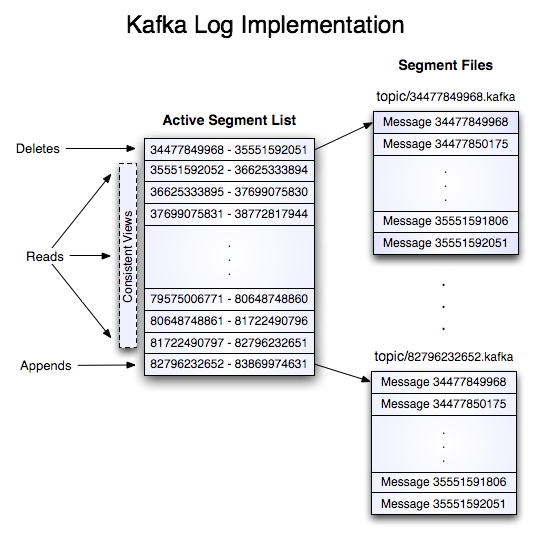

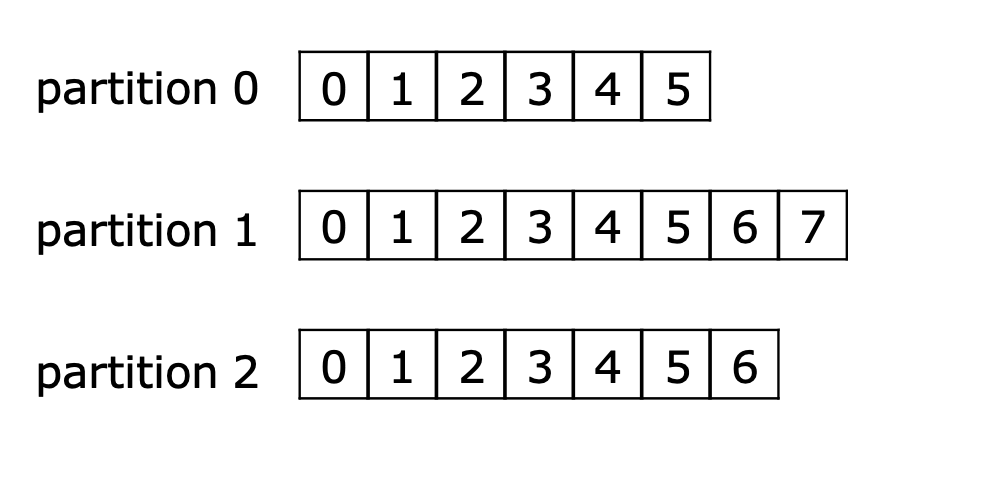
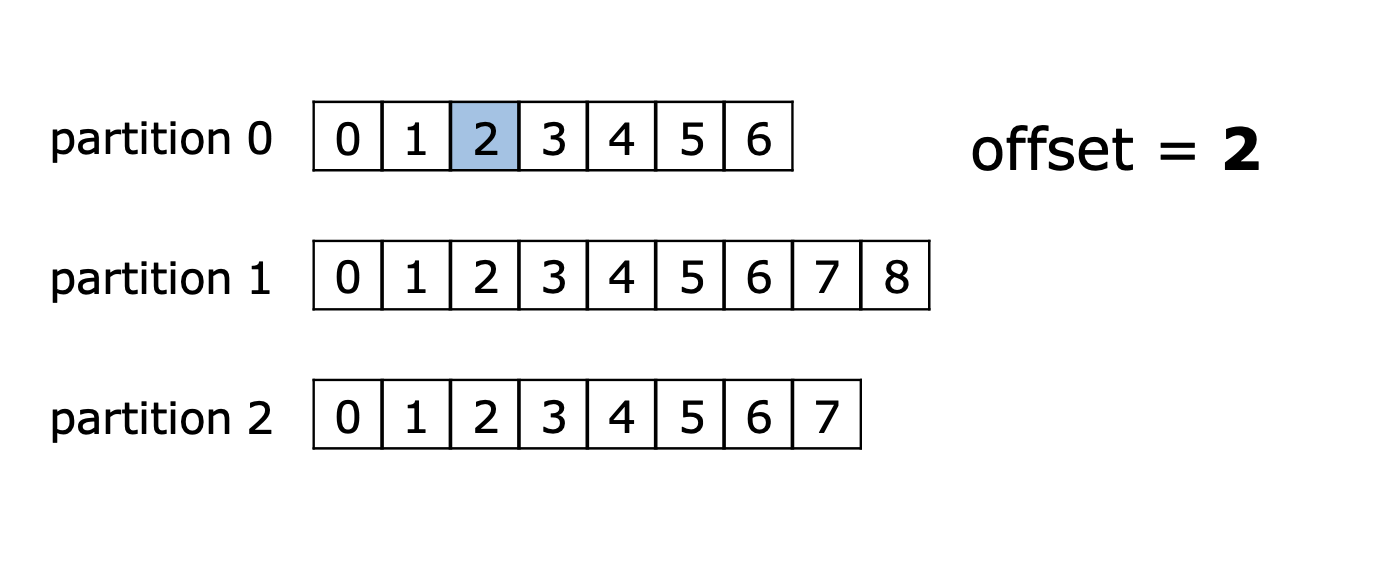
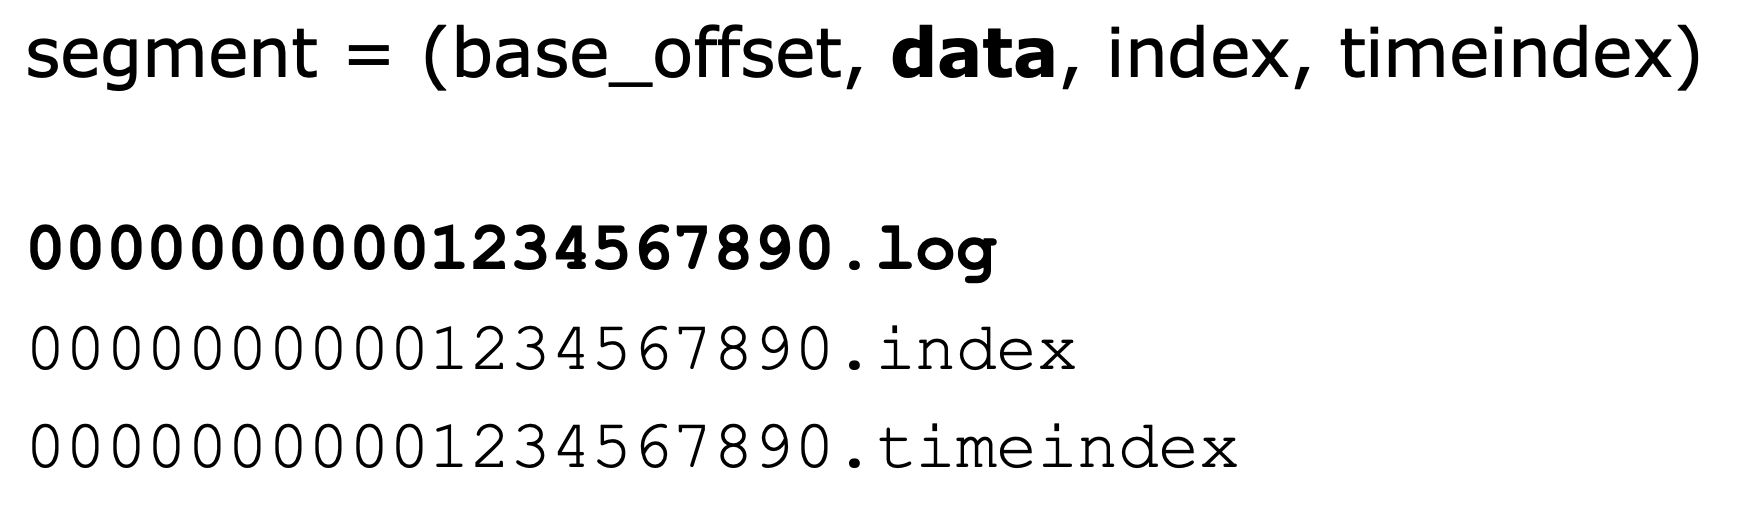

## retention.ms
Если мы используем политику хранения «удалить», эта конфигурация контролирует максимальное время, в течение которого мы будем хранить журналы, а затем мы будем отбрасывать старые сегменты журнала, чтобы освободить место. Это представляет собой продолжительность времени, в течение которого потребитель SLA должен прочитать данные.
## segment.bytes
Эта конфигурация управляет размером файла сегмента журнала. Сохраняйте и очищайте по одному файлу за раз, поэтому больший размер сегмента означает меньшее количество файлов, но менее детальный контроль над уровнем хранения.
## segment.ms
Эта конфигурация контролирует период времени, в течение которого Kafka принудительно запускает журналы, чтобы гарантировать, что старые данные могут быть удалены или сжаты, даже если файл сегмента не заполнен.
## retention.bytes
Если мы используем политику хранения «удалить», эта конфигурация будет контролировать максимальный размер журнала, после которого мы будем отбрасывать старые сегменты журнала, чтобы освободить место. По умолчанию ограничение по размеру не установлено, а только по времени.

In [6]:
# Создадим топик
!kafka_2.13-2.7.0/bin/kafka-topics.sh --create --topic students --bootstrap-server localhost:9092
# Редактируем топик
!kafka_2.13-2.7.0/bin/kafka-configs.sh --bootstrap-server localhost:9092 --entity-type topics --entity-name students --alter --add-config retention.ms=30000

Error while executing topic command : Topic 'students' already exists.
[2022-05-11 18:25:43,465] ERROR org.apache.kafka.common.errors.TopicExistsException: Topic 'students' already exists.
 (kafka.admin.TopicCommand$)
Completed updating config for topic students.


In [1]:
from kafka import KafkaProducer

producer = KafkaProducer(bootstrap_servers='localhost:9092')

In [4]:
producer.send('students', b'Hello, World, again!')

In [9]:
import time

for i in range(60):
    producer.send('students', b'i')
    time.sleep(1)

In [8]:
producer.send('students', b'Hello, World!')

In [65]:
# kafka_2.13-2.7.0/bin/kafka-console-consumer.sh --topic students --bootstrap-server localhost:9092 --consumer-property auto.offset.reset=earliest --consumer-property enable.auto.commit=false
# kafka_2.13-2.7.0/bin/kafka-console-consumer.sh --topic students --bootstrap-server localhost:9092 --consumer-property auto.offset.reset=earliest
producer.send('students', b'Hello, World!', key=b'aleksandr')

In [10]:
!ls -la /tmp/kafka-logs/students-0

total 32
drwxr-xr-x  2 root root     4096 May 11 18:28 .
drwxr-xr-x 55 root root     4096 May 11 18:31 ..
-rw-r--r--  1 root root 10485760 May 11 18:29 00000000000000000085.index
-rw-r--r--  1 root root     4420 May 11 18:31 00000000000000000085.log
-rw-r--r--  1 root root       10 May 11 18:27 00000000000000000085.snapshot
-rw-r--r--  1 root root 10485756 May 11 18:29 00000000000000000085.timeindex
-rw-r--r--  1 root root        9 May 11 18:27 leader-epoch-checkpoint


In [12]:
!kafka_2.13-2.7.0/bin/kafka-consumer-groups.sh --bootstrap-server localhost:9092 --group my-group --describe


GROUP           TOPIC           PARTITION  CURRENT-OFFSET  LOG-END-OFFSET  LAG             CONSUMER-ID                                             HOST            CLIENT-ID
my-group        olga_p          0          2               2               0               kafka-python-2.0.2-fe81f565-9519-4c29-9d0e-01e2b4b27937 /10.128.0.18    kafka-python-2.0.2
my-group        students        0          18              149             131             -                                                       -               -


In [14]:
!kafka_2.13-2.7.0/bin/kafka-topics.sh --describe --topic  --bootstrap-server localhost:9092

Error while executing topic command : Topic 'homeworks' does not exist as expected
[2022-05-11 18:46:16,969] ERROR java.lang.IllegalArgumentException: Topic 'homeworks' does not exist as expected
	at kafka.admin.TopicCommand$.kafka$admin$TopicCommand$$ensureTopicExists(TopicCommand.scala:539)
	at kafka.admin.TopicCommand$AdminClientTopicService.describeTopic(TopicCommand.scala:316)
	at kafka.admin.TopicCommand$.main(TopicCommand.scala:70)
	at kafka.admin.TopicCommand.main(TopicCommand.scala)
 (kafka.admin.TopicCommand$)


## Гарантии надежности и доставки сообщений

KafkaProducer обеспечивает надежность данных с помощью параметра конфигурации acks. Параметр acks указывает, сколько подтверждений должен получить продюсер, чтобы запись считалась доставленной брокеру. Варианты значений:

none — продюсер считает записи успешно доставленными после их отправки на брокер. Никакого подтверждения он не ждет.

one— продюсер ждет от брокера лидера подтверждение того, что он занес запись в лог.

all— продюсер ждет подтверждения от брокера лидера и реплик.